In [1]:
import pandas as pd
import numpy as np

In [98]:
dados = pd.read_csv('../Netflix/ViewingActivity.csv')
dados.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,ANA,2022-12-29 20:03:04,00:00:22,Autoplayed: user action: None;,Mistério no Mediterrâneo (Trailer),TRAILER,Samsung CE 2021 Kant-S2e UHD (AU8000) TV Smart TV,00:00:22,00:00:22,BR (Brazil)
1,ANA,2022-12-29 20:01:20,00:01:32,Autoplayed: user action: None;,Klaus (Trailer),TRAILER,Samsung CE 2021 Kant-S2e UHD (AU8000) TV Smart TV,00:01:32,00:01:32,BR (Brazil)
2,ANA,2022-12-29 19:59:34,00:00:12,Autoplayed: user action: None;,Kung Fu Hustle_hook_primary_16x9,HOOK,Samsung CE 2021 Kant-S2e UHD (AU8000) TV Smart TV,00:00:12,00:00:12,BR (Brazil)
3,ANA,2022-12-02 23:35:22,00:00:15,Autoplayed: user action: None;,Justiça em Família (Clipe 2): Justiça em Família,HOOK,Samsung CE 2021 Kant-S2e UHD (AU8000) TV Smart TV,00:00:15,00:00:15,BR (Brazil)
4,ANA,2022-12-02 23:34:57,00:00:04,Autoplayed: user action: None;,Temporada 4 (Trailer): Elite,TRAILER,Samsung CE 2021 Kant-S2e UHD (AU8000) TV Smart TV,00:00:04,00:00:04,BR (Brazil)


In [4]:
dados.shape

(1606, 10)

In [3]:
dados.dtypes

Profile Name       object
Start Time         object
Duration           object
Title              object
Device Type        object
Bookmark           object
Latest Bookmark    object
dtype: object

In [101]:
dados['Duration'] = pd.to_timedelta(dados['Duration'])
dados['Bookmark'] = pd.to_timedelta(dados['Bookmark'])
dados['Start Time'] = pd.to_datetime(dados['Start Time'])
dados = dados[dados['Profile Name'] != 'TECO']
dados.dtypes

Profile Name                        object
Start Time                  datetime64[ns]
Duration                   timedelta64[ns]
Attributes                          object
Title                               object
Supplemental Video Type             object
Device Type                         object
Bookmark                   timedelta64[ns]
Latest Bookmark                     object
Country                             object
dtype: object

In [7]:
dados['Profile Name'].value_counts()

Profile Name
PAULO     906
RENATO    645
ANA        54
TECO        1
Name: count, dtype: int64

<Axes: xlabel='Profile Name'>

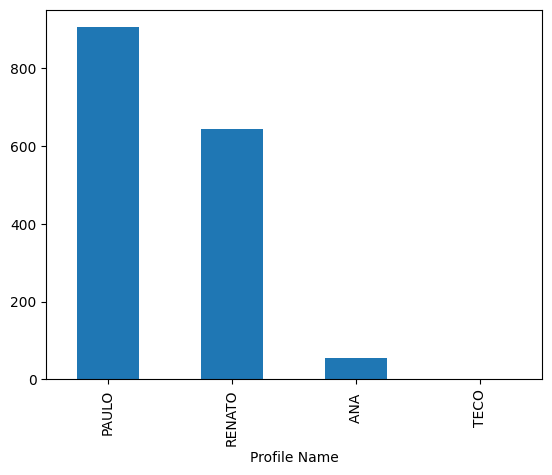

In [24]:
import matplotlib.pyplot as plt

dados['Profile Name'].value_counts().plot(kind='bar')

In [85]:
dados.groupby('Profile Name')['Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Profile Name,,,,,,,,
ANA,54,0 days 00:04:27.703703703,0 days 00:21:07.389913787,0 days 00:00:04,0 days 00:00:08.250000,0 days 00:00:16.500000,0 days 00:00:37.250000,0 days 02:04:38
PAULO,906,0 days 00:25:13.858719646,0 days 00:18:19.634140019,0 days 00:00:01,0 days 00:13:59.500000,0 days 00:21:27,0 days 00:41:46.500000,0 days 02:31:45
RENATO,645,0 days 00:34:39.514728682,0 days 00:42:20.147697419,0 days 00:00:01,0 days 00:00:26,0 days 00:14:39,0 days 01:13:52,0 days 02:46:34


<Axes: xlabel='Profile Name', ylabel='Duration'>

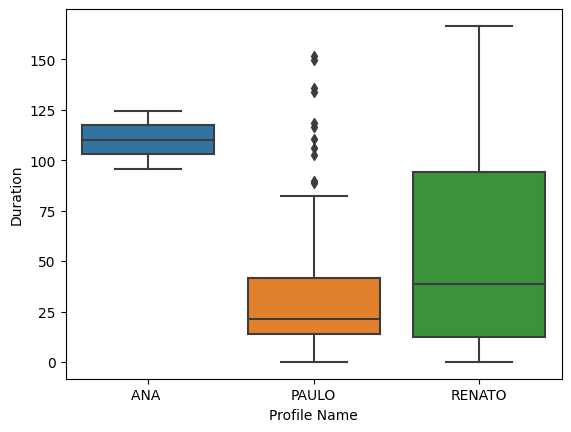

In [104]:
import seaborn as sns

tempo = dados[['Profile Name', 'Duration']]
tempo = tempo[tempo['Profile Name'] != 'TECO']
tempo['Duration'] = pd.to_numeric(tempo['Duration'])/(1000000000*60)  #Conversão para minutos

sns.boxplot(tempo, x = 'Profile Name', y = 'Duration')

In [86]:
dados.groupby('Profile Name')['Duration'].sum()

Profile Name
ANA       0 days 04:00:56
PAULO    15 days 20:59:16
RENATO   15 days 12:34:47
Name: Duration, dtype: timedelta64[ns]

In [91]:
dados.groupby('Profile Name')['Supplemental Video Type'].value_counts()

Profile Name  Supplemental Video Type
ANA           HOOK                        31
              TRAILER                     17
              TEASER_TRAILER               4
PAULO         PROMOTIONAL                  1
RENATO        HOOK                       146
              TRAILER                     41
              TEASER_TRAILER              18
Name: count, dtype: int64

In [102]:
dados = dados[dados['Supplemental Video Type'].isnull()]
dados['Profile Name'].value_counts()

Profile Name
PAULO     905
RENATO    440
ANA         2
Name: count, dtype: int64

In [103]:
dados.groupby('Profile Name')['Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Profile Name,,,,,,,,
ANA,2,0 days 01:50:12.500000,0 days 00:20:24.001838233,0 days 01:35:47,0 days 01:42:59.750000,0 days 01:50:12.500000,0 days 01:57:25.250000,0 days 02:04:38
PAULO,905,0 days 00:25:15.510497237,0 days 00:18:19.117013944,0 days 00:00:01,0 days 00:14:04,0 days 00:21:27,0 days 00:41:49,0 days 02:31:45
RENATO,440,0 days 00:50:34.279545454,0 days 00:42:47.149340643,0 days 00:00:01,0 days 00:12:21.750000,0 days 00:38:35,0 days 01:34:23.500000,0 days 02:46:34


Device Type
Android DefaultWidevineL3Phone Android Phone         682
Firefox PC (Cadmium)                                 438
Android DefaultWidevineL3Tablet Android Tablet       168
Samsung CE 2021 Kant-S2e UHD (AU8000) TV Smart TV     55
DefaultWidevineAndroidPhone                            2
Edge (Cadmium)                                         2
Name: count, dtype: int64